<a href="https://colab.research.google.com/github/nupnik267/Final-Year-Project/blob/main/fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SRGAN**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/fyp/SRGAN

/content/drive/MyDrive/fyp/SRGAN


In [3]:
%cd /content/drive/MyDrive/fyp/SRGAN/LR
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  savefile = open(fn, 'wb')
  savefile.write(uploaded[fn])
  print('Successfully uploaded "{}" ({} bytes).'.format(fn, len(uploaded[fn])))
  savefile.close()

/content/drive/MyDrive/fyp/SRGAN/LR


Saving baboon.png to baboon.png
Successfully uploaded "baboon.png" (33918 bytes).


In [4]:
%cd /content/drive/MyDrive/fyp/SRGAN
!python test.py

/content/drive/MyDrive/fyp/SRGAN
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 baboon


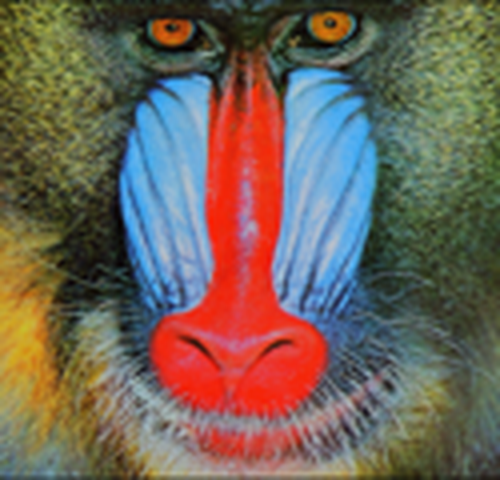

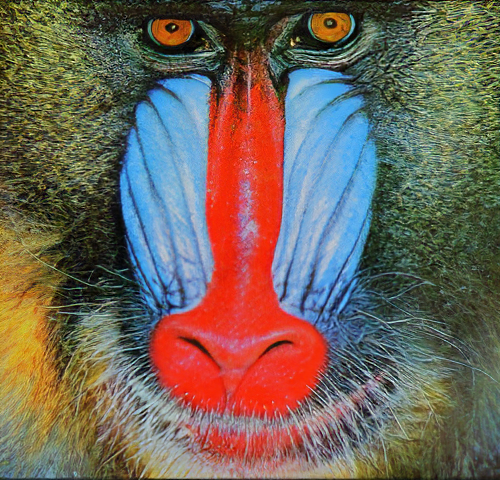

In [6]:
from PIL import Image

im1 = Image.open('/content/drive/MyDrive/fyp/SRGAN/LR/baboon.png',)
im2 = Image.open('/content/drive/MyDrive/fyp/SRGAN/results/baboon_rlt.png')
w, h = im2.size
im1 = im1.resize((w, h), Image.ANTIALIAS)
display(im1)
display(im2)

#**DeNoising**

In [7]:
%cd /content/drive/MyDrive/fyp/deblurring/datasets/personal_images/personal_images_noise45

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  savefile = open(fn, 'wb')
  savefile.write(uploaded[fn])
  print('Successfully uploaded "{}" ({} bytes).'.format(fn, len(uploaded[fn])))
  savefile.close()

/content/drive/MyDrive/fyp/deblurring/datasets/personal_images/personal_images_noise45


Saving dog.png to dog (1).png
Successfully uploaded "dog.png" (8846 bytes).


In [8]:
%cd /content/drive/MyDrive/fyp/deblurring/codes
!python interpolate.py -opt options/test/test.json

/content/drive/MyDrive/fyp/deblurring/codes
export CUDA_VISIBLE_DEVICES=0
22-05-20 07:30:35.773 - INFO:   name: modulation_noise45_adafmnet_noise15to75
  suffix: None
  model: sr
  crop_size: 0
  gpu_ids: [0]
  interpolate_stride: 0.1
  datasets:[
    test_2:[
      name: personal_images
      mode: LR
      dataroot_LR: ../datasets/personal_images/personal_images_noise45
      phase: test
      data_type: img
    ]
  ]
  path:[
    root: ../
    pretrain_model_G: ../experiments/pretrained_models/noise15to75.pth
    results_root: ../results/modulation_noise45_adafmnet_noise15to75
    log: ../results/modulation_noise45_adafmnet_noise15to75
  ]
  network_G:[
    which_model_G: adaptive_resnet
    norm_type: adafm
    nf: 64
    nb: 16
    in_nc: 3
    out_nc: 3
    adafm_ksize: 1
  ]
  is_train: False

22-05-20 07:30:35.954 - INFO: Dataset [LRDataset - personal_images] is created.
22-05-20 07:30:35.954 - INFO: Number of test images in [personal_images]: 3
22-05-20 07:30:40.961 - INFO: Lo

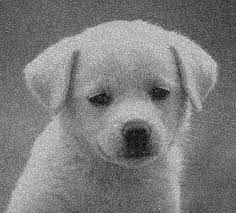

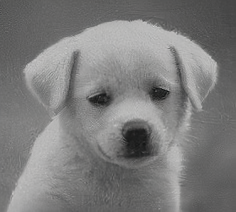

In [9]:
im = Image.open('/content/drive/MyDrive/fyp/deblurring/datasets/personal_images/personal_images_noise45/dog.png')
imc = Image.open('/content/drive/MyDrive/fyp/deblurring/results/modulation_noise45_adafmnet_noise15to75/personal_images/dog/dog_coef_0.10.png')
display(im)
display(imc)

#**Colorizer**

In [12]:
%cd /content/drive/MyDrive/fyp/DeOldify
# !pip install -r colab_requirements.txt

/content/drive/MyDrive/fyp/DeOldify


In [13]:
from deoldify.visualize import *
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential s

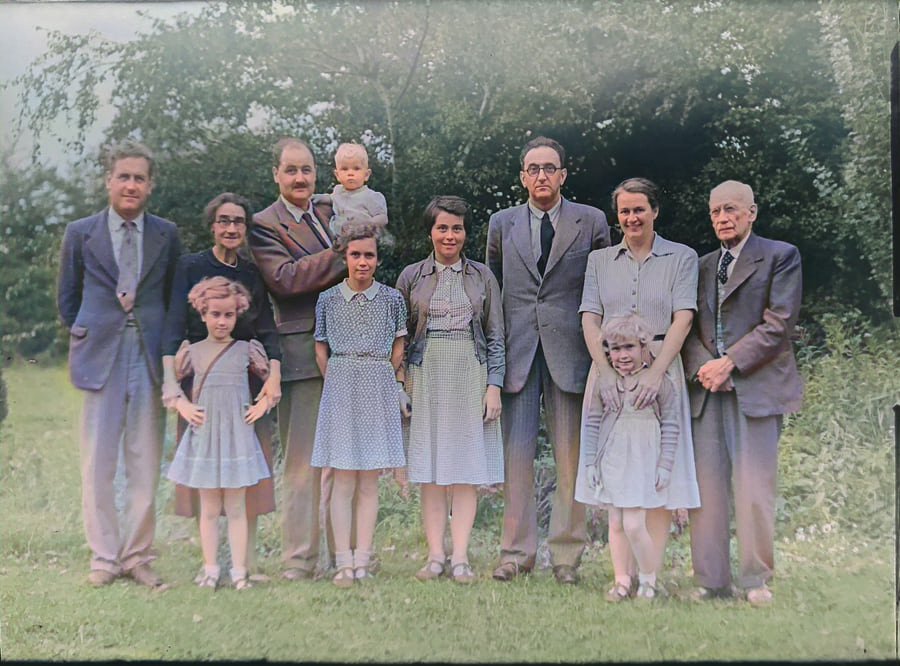

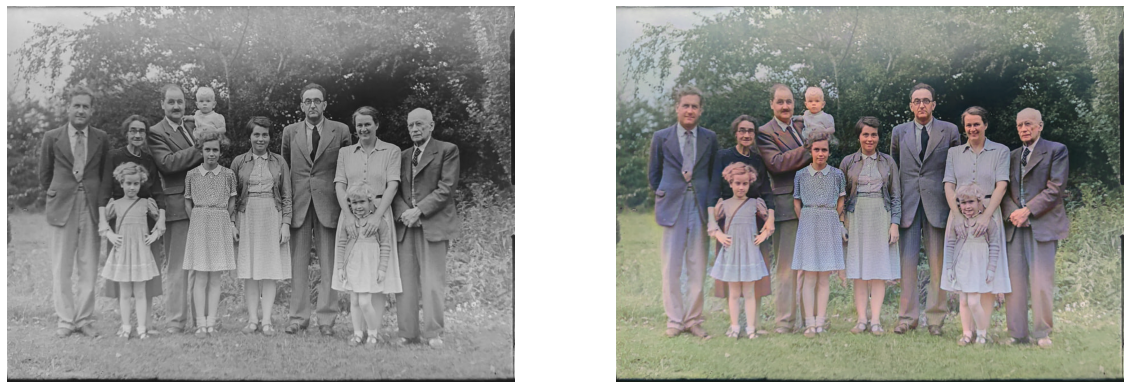

In [14]:
source_url = 'https://images.unsplash.com/photo-1542216515-4e6a586c1ca0?crop=entropy&cs=tinysrgb&fm=jpg&ixlib=rb-1.2.1&q=60&raw_url=true&ixid=MnwxMjA3fDB8MHxzZWFyY2h8N3x8b2xkJTIwcGhvdG9zfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=900' #@param {type:"string"}
render_factor = 31  #@param {type: "slider", min: 7, max: 40}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=False)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')